In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

x_train = train.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
x_test = test2.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814262 entries, 0 to 814261
Data columns (total 12 columns):
hash             814262 non-null object
trajectory_id    814262 non-null object
time_entry       814262 non-null int64
time_exit        814262 non-null int64
vmean            814262 non-null float64
x_entry          814262 non-null float64
y_entry          814262 non-null float64
x_exit           814262 non-null float64
y_exit           814262 non-null float64
x_req            814262 non-null float64
y_req            814262 non-null float64
time             814262 non-null int64
dtypes: float64(7), int64(3), object(2)
memory usage: 74.5+ MB


In [4]:
test2[:10]

hash  \
0  00032f51796fd5437b238e3a9823d13d_31   
1  000479418b5561ab694a2870cc04fd43_25   
2  000506a39775e5bca661ac80e3f466eb_29   
3   0005401ceddaf27a9b7f0d42ef1fbe95_1   
4   00063a4f6c12e1e4de7d876580620667_3   
5   0006535be25bb52dd06983447880c964_5   
6  0006f84bb33ec929d1cda7686f861d0a_31   
7  00093ae562586aed0e053b8431e8ace4_23   
8  000c739e444a70e1804d757a0580caaa_31   
9  000d479078af08618bddc7f09082b8c3_11   

                                 trajectory_id  time_entry  time_exit  vmean  \
0   traj_00032f51796fd5437b238e3a9823d13d_31_5       54212      54632    0.0   
1  traj_000479418b5561ab694a2870cc04fd43_25_10       55749      55856    0.0   
2   traj_000506a39775e5bca661ac80e3f466eb_29_5       55568      55568    0.0   
3    traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4       56118      56525    0.0   
4    traj_00063a4f6c12e1e4de7d876580620667_3_4       53647      54314    0.0   
5   traj_0006535be25bb52dd06983447880c964_5_12       55326      55326    0.0   
6   traj_0006f84bb33ec929d1cda7686f861d0a_31_3       54012      54012    0.0   
7  traj_00093ae562586aed0e053b8431e8ace4_23_10       57189      57189    0.0   
8   traj_000c739e444a70e1804d757a0580caaa_31_3       56491      56491    0.0   
9   traj_000d479078af08618bddc7f09082b8c3_11_6       53886      54220    0.0   

        x_entry       y_entry  x_exit  y_exit         x_req         y_req  \
0  3.773118e+06 -1.914490e+07     NaN     NaN  3.773385e+06 -1.911344e+07   
1  3.769978e+06 -1.934136e+07     NaN     NaN  3.771380e+06 -1.933274e+07   
2  3.757468e+06 -1.923860e+07     NaN     NaN  3.755349e+06 -1.916135e+07   
3  3.760505e+06 -1.935500e+07     NaN     NaN  3.751349e+06 -1.916284e+07   
4  3.766319e+06 -1.917013e+07     NaN     NaN  3.776264e+06 -1.918289e+07   
5  3.776037e+06 -1.916993e+07     NaN     NaN  3.769801e+06 -1.935089e+07   
6  3.760009e+06 -1.923361e+07     NaN     NaN  3.759835e+06 -1.924379e+07   
7  3.756665e+06 -1.914692e+07     NaN     NaN  3.756680e+06 -1.914717e+07   
8  3.768082e+06 -1.922134e+07     NaN     NaN  3.768081e+06 -1.922126e+07   
9  3.766505e+06 -1.920176e+07     NaN     NaN  3.744812e+06 -1.932195e+07   

   time  
0   420  
1   107  
2     0  
3   407  
4   667  
5     0  
6     0  
7     0  
8     0  
9   334

In [34]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

columns=['x_entry','y_entry']
data=train[columns]
trainend=np.shape(data)[0]
data=data.append(test[columns])
testend=np.shape(data)[0]
data=data.append(test2[columns])



c = DBSCAN(eps=220,
            min_samples=35,
            n_jobs=-1
            ).fit_predict(data)

labels=list(np.unique(c))
clusters=len(labels)
train_c=c[:trainend]
test_c=c[trainend:testend]
test2_c=c[testend:]
"""
clusters=1000
cmodel = MiniBatchKMeans(n_clusters=clusters,
                         random_state=12345,
                         reassignment_ratio=0.9,
                         batch_size=10000, 
                        verbose=True
                        )

cmodel.fit(data)  
train_c=cmodel.predict(train[columns])
test2_c=cmodel.predict(test2[columns])
labels=range(clusters)
"""
#


'\nclusters=1000\ncmodel = MiniBatchKMeans(n_clusters=clusters,\n                         random_state=12345,\n                         reassignment_ratio=0.9,\n                         batch_size=10000, \n                        verbose=True\n                        )\n\ncmodel.fit(data)  \ntrain_c=cmodel.predict(train[columns])\ntest2_c=cmodel.predict(test2[columns])\nlabels=range(clusters)\n'

In [35]:
clusters

1612

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


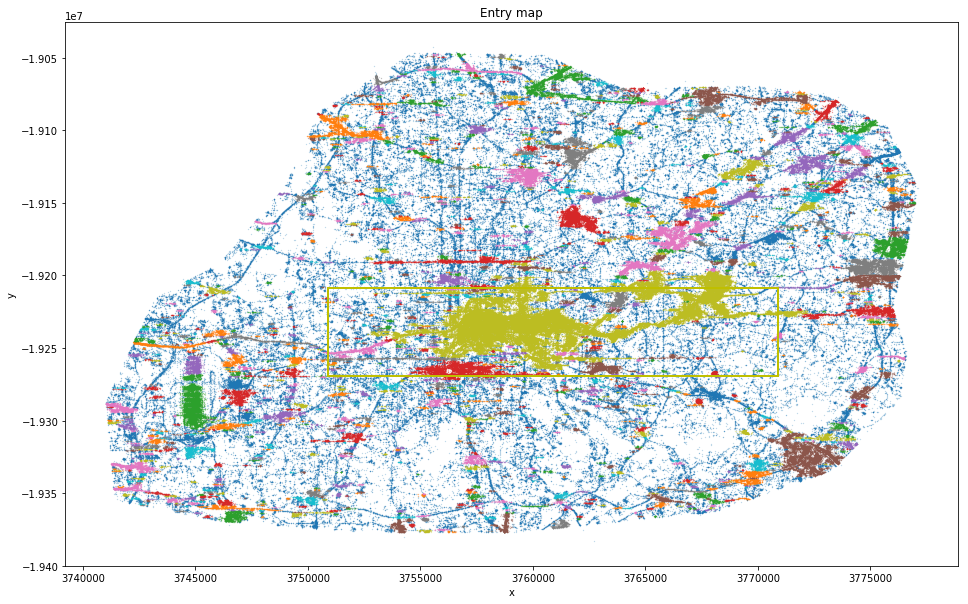

In [36]:
data=train[columns]
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


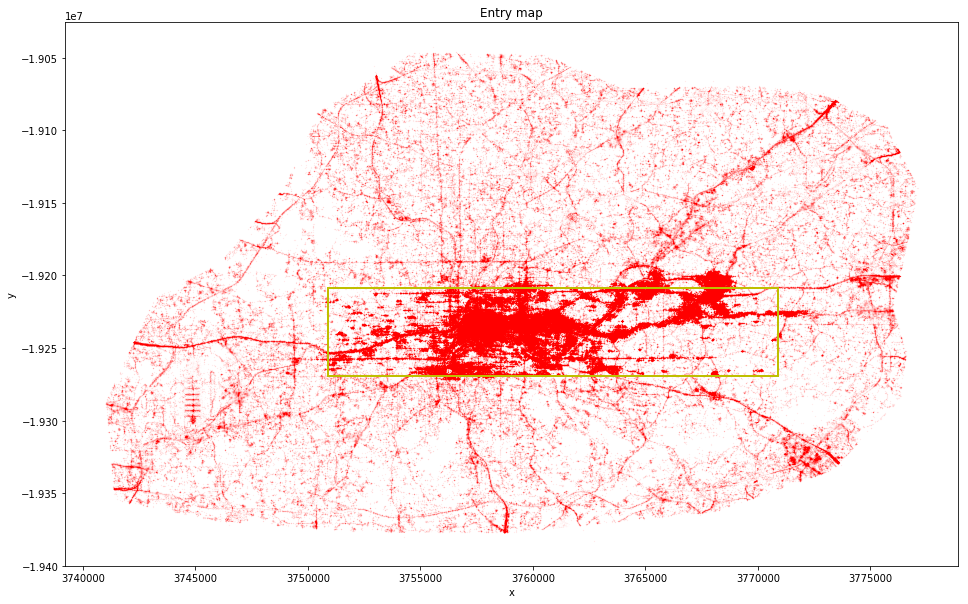

In [37]:

proba=[]
for c in labels:
    mean = np.mean(y_train[train_c==c].y)
    mean= mean #+ (0.2*(1-mean))
    proba.append(mean)
c_proba = pd.DataFrame({'c':labels,'proba':proba})



data=train[columns]

#train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

In [40]:
import lightgbm as lgb

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.05,
    'num_leaves' : 30,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss',
    'min_data':1  ,
    'min_data_in_bin':1
}


def naklastry():
    pred = pd.DataFrame({'c':test2_c,'target':test2_c})
    for c in labels:
        xc_train=x_train[train_c==c]
        yc_train=y_train[train_c==c].y.values
        xc_test=x_test[test2_c==c]
        if len(xc_test)==0:
            continue
        print(len(xc_train),len(xc_test))
        d_train = lgb.Dataset(xc_train, label=yc_train)
        clf = lgb.train(params, d_train)
        #Prediction
        target=list(clf.predict(xc_test))

        def add(row,c):
            if row['c']==c:
                return target.pop(0)
            else:
                return row.target

        pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
        print('done:',c)
    return pred.target.values

def jedna():
    d_train = lgb.Dataset(x_train, label=y_train.y.values)
    clf = lgb.train(params, d_train)
    #Prediction
    target=list(clf.predict(x_test))
    print('done:',c)    
    return target
  
        
city_lgbm_proba=naklastry()   

211994 7754
done: -1
5617 237
done: 0
23165 1272
done: 1
1193 53
done: 2
2128 90
done: 3
1801 65
done: 4
7326 343
done: 5
2199 76
done: 6
192804 7937
done: 7
501 15
done: 8
181 7
done: 9
1467 47
done: 10
7915 448
done: 11
13056 505
done: 12
1636 86
done: 13
6528 309
done: 14
6059 251
done: 15
65 2
done: 16
324 11
done: 17
1468 75
done: 18
2399 115
done: 19
2323 100
done: 20
2620 124
done: 21
111 10
done: 22
1761 81
done: 23
17226 773
done: 24
2804 118
done: 25
626 21
done: 26
468 20
done: 27
1516 71
done: 28
102 4
done: 29
1959 88
done: 30
7683 343
done: 31
10601 494
done: 32
819 41
done: 33
1585 70
done: 34
29 1
done: 35
12083 590
done: 36
87 4
done: 37
1905 74
done: 38
824 22
done: 39
2359 81
done: 40
135 2
done: 41
709 20
done: 42
118 6
done: 43
61 4
done: 44
1203 59
done: 45
1001 24
done: 46
137 3
done: 47
684 31
done: 48
530 25
done: 49
142 6
done: 50
107 4
done: 51
181 3
done: 52
2224 89
done: 53
154 4
done: 54
1161 41
done: 55
807 32
done: 56
31 2
done: 57
532 19
done: 58
2345 8

done: 522
183 10
done: 523
129 5
done: 524
89 7
done: 525
52 1
done: 526
54 4
done: 527
136 7
done: 528
113 2
done: 529
83 2
done: 530
61 5
done: 531
220 16
done: 532
51 2
done: 533
97 4
done: 534
136 3
done: 535
60 2
done: 536
60 6
done: 537
125 8
done: 538
103 2
done: 540
111 8
done: 541
52 3
done: 542
160 6
done: 543
52 1
done: 544
52 4
done: 545
93 5
done: 546
51 3
done: 547
36 2
done: 548
473 10
done: 549
106 9
done: 550
196 9
done: 551
77 4
done: 552
156 2
done: 553
55 4
done: 554
122 3
done: 555
27 3
done: 556
34 4
done: 557
135 6
done: 558
197 10
done: 559
59 5
done: 561
79 4
done: 562
47 3
done: 563
99 3
done: 564
43 3
done: 565
187 2
done: 566
98 4
done: 567
56 7
done: 568
96 3
done: 569
68 2
done: 570
51 1
done: 571
77 1
done: 572
162 5
done: 573
37 2
done: 574
31 1
done: 575
363 16
done: 576
36 4
done: 577
31 1
done: 579
79 5
done: 580
73 2
done: 581
162 9
done: 582
78 4
done: 583
33 2
done: 584
36 1
done: 585
33 1
done: 586
68 9
done: 588
84 3
done: 589
77 3
done: 590
65 2

done: 1128
39 1
done: 1129
71 2
done: 1130
71 5
done: 1132
75 2
done: 1133
99 5
done: 1134
35 1
done: 1135
42 2
done: 1136
41 2
done: 1137
39 2
done: 1138
36 2
done: 1139
27 1
done: 1140
41 2
done: 1141
96 1
done: 1142
36 2
done: 1143
67 9
done: 1144
149 3
done: 1145
70 3
done: 1147
37 1
done: 1148
50 1
done: 1149
80 5
done: 1151
32 1
done: 1156
35 3
done: 1157
27 1
done: 1158
36 2
done: 1159
52 1
done: 1160
37 2
done: 1161
68 2
done: 1162
73 4
done: 1164
100 6
done: 1165
44 2
done: 1166
58 4
done: 1167
61 2
done: 1168
49 4
done: 1169
57 2
done: 1170
35 3
done: 1171
53 1
done: 1172
21 1
done: 1173
45 2
done: 1174
61 9
done: 1177
34 2
done: 1180
37 3
done: 1181
42 2
done: 1183
37 1
done: 1184
70 2
done: 1185
48 1
done: 1186
39 1
done: 1187
59 1
done: 1188
70 1
done: 1189
35 2
done: 1191
42 2
done: 1192
45 1
done: 1193
31 1
done: 1194
17 1
done: 1195
44 1
done: 1196
49 6
done: 1197
45 1
done: 1199
53 1
done: 1200
21 4
done: 1201
71 4
done: 1202
44 1
done: 1203
27 2
done: 1204
46 3
done: 

In [41]:
from sklearn.neural_network import MLPClassifier


# parameters for MLPC
model = MLPClassifier(
        hidden_layer_sizes=[200],
        max_iter=100,
        solver='adam',
        learning_rate='constant',
        activation='tanh',
        learning_rate_init=.005,
        verbose=False
)

def naklastry():
    pred = pd.DataFrame({'c':test2_c,'target':test2_c})
    for c in range(clusters):
        xc_train=x_train[train_c==c]
        yc_train=y_train[train_c==c].y.values
        xc_test=x_test[test2_c==c]
        if len(xc_test)==0:
            continue

        model.fit(xc_train, yc_train)
        
        #Prediction
        target=list(model.predict_proba(xc_test)[:,1])

        def add(row,c):
            if row['c']==c:
                return target.pop(0)
            else:
                return row.target

        pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
        print('done:',c)
    return pred.target.values

def jedna():
   
    model.fit(x_train, y_train.y.values)
        
    #Prediction
    target=list(model.predict_proba(x_test)[:,1])
    print('done:',c)    
    return target
  
        
city_mlpc_proba=naklastry()   
#city_mlpc_proba=jedna()
city_mlpc_proba[:20]

done: 0
done: 1
done: 2
done: 3
done: 4
done: 5
done: 6
done: 7
done: 8
done: 9
done: 10
done: 11
done: 12
done: 13
done: 14
done: 15
done: 16
done: 17
done: 18
done: 19
done: 20
done: 21
done: 22
done: 23
done: 24
done: 25
done: 26
done: 27
done: 28
done: 29
done: 30
done: 31
done: 32
done: 33
done: 34
done: 35
done: 36
done: 37
done: 38
done: 39
done: 40
done: 41
done: 42
done: 43
done: 44
done: 45
done: 46
done: 47
done: 48
done: 49
done: 50
done: 51
done: 52
done: 53
done: 54
done: 55
done: 56
done: 57
done: 58
done: 59
done: 60
done: 61
done: 62
done: 63
done: 64
done: 65
done: 66
done: 67
done: 68
done: 69
done: 70
done: 71
done: 72
done: 73
done: 74
done: 75
done: 76
done: 77
done: 78
done: 79
done: 80
done: 81
done: 82
done: 83
done: 84
done: 85
done: 86
done: 87
done: 88
done: 89
done: 90
done: 91
done: 92
done: 93
done: 94
done: 95
done: 96
done: 97
done: 98
done: 99
done: 100
done: 101
done: 102
done: 103
done: 104
done: 105
done: 106
done: 107
done: 108
done: 109
done: 110


done: 885
done: 886
done: 887
done: 889
done: 890
done: 891
done: 892
done: 893
done: 895
done: 896
done: 897
done: 899
done: 900
done: 901
done: 902
done: 903
done: 904
done: 905
done: 906
done: 907
done: 908
done: 909
done: 910
done: 911
done: 912
done: 913
done: 914
done: 915
done: 916
done: 917
done: 918
done: 919
done: 920
done: 921
done: 922
done: 923
done: 924
done: 925
done: 926
done: 927
done: 928
done: 929
done: 930
done: 931
done: 932
done: 933
done: 934
done: 935
done: 936
done: 937
done: 938
done: 939
done: 940
done: 941
done: 942
done: 943
done: 944
done: 945
done: 947
done: 950
done: 951
done: 952
done: 953
done: 954
done: 955
done: 956
done: 957
done: 958
done: 960
done: 961
done: 962
done: 963
done: 964
done: 965
done: 966
done: 967
done: 968
done: 970
done: 971
done: 972
done: 973
done: 974
done: 976
done: 979
done: 980
done: 982
done: 983
done: 984
done: 985
done: 986
done: 987
done: 988
done: 989
done: 990
done: 991
done: 992
done: 993
done: 994
done: 995
done: 996


array([ 3.00042675e-02,  2.92901823e-02,  9.01685930e-01, -1.00000000e+00,
        4.82352499e-02,  9.40856494e-03,  9.01685930e-01,  4.52990117e-04,
        9.01685930e-01,  9.01685930e-01, -1.00000000e+00,  9.01685930e-01,
        4.04155112e-04,  1.40201109e-02,  1.17125124e-01,  9.01685930e-01,
        5.87608691e-02,  3.35350120e-01, -1.00000000e+00,  5.51587668e-02])

In [42]:

X = test2['x_entry'].values 
Y = test2['y_entry'].values

def score(x):
    if x>0.5:
        return 1
    else:
        return 0

city_proba_proba=[c_proba[c_proba.c==x]['proba'].values[0] for x in test2_c]  
    
city_sqrt = [within_measure(x, y) for x,y in zip(X,Y)]
city_proba= [score(x) for x in city_proba_proba]
city_lgbm = [score(x) for x in city_lgbm_proba]
city_mlpc = [score(x) for x in city_mlpc_proba]


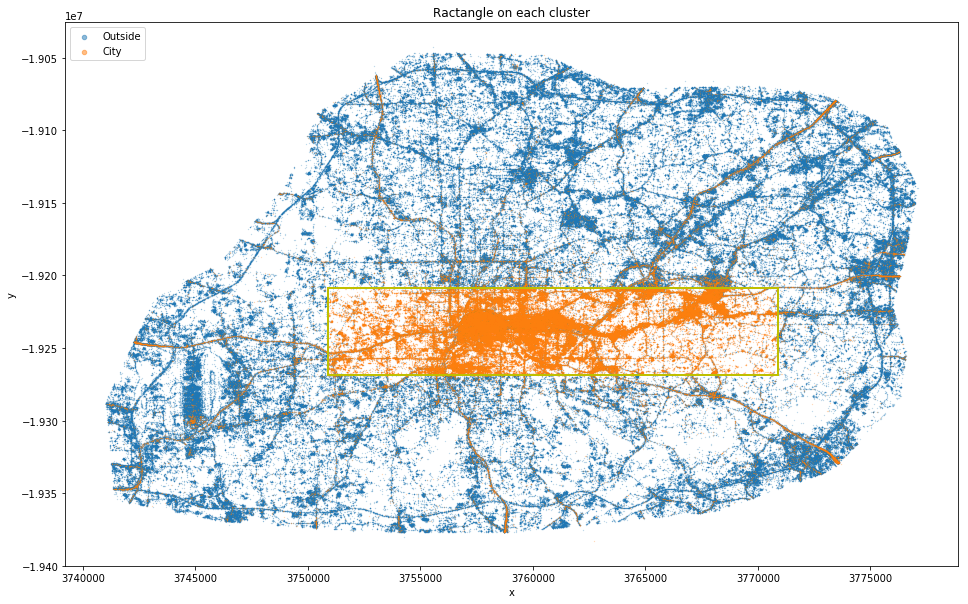

In [43]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



leg=['Outside','City']
# Plot
for data in [train[y_train.y.values==0],train[y_train.y.values==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Ractangle on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


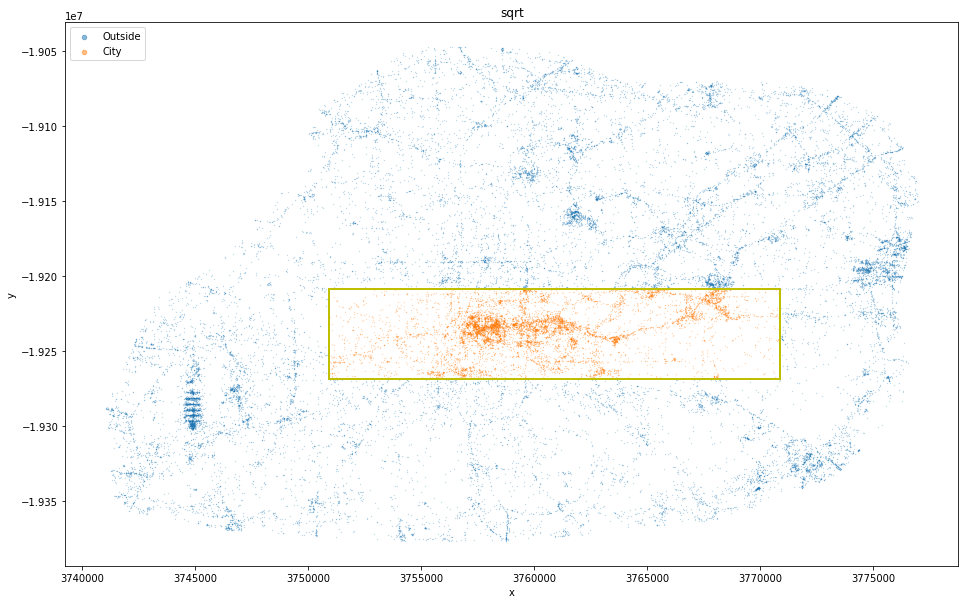

In [44]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_sqrt

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='sqrt')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


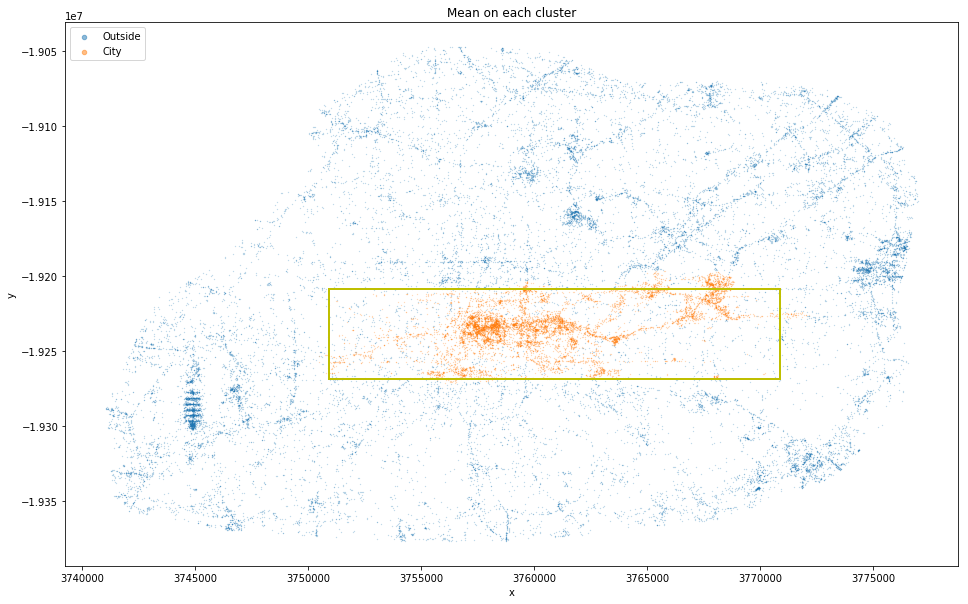

In [45]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_proba

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Mean on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


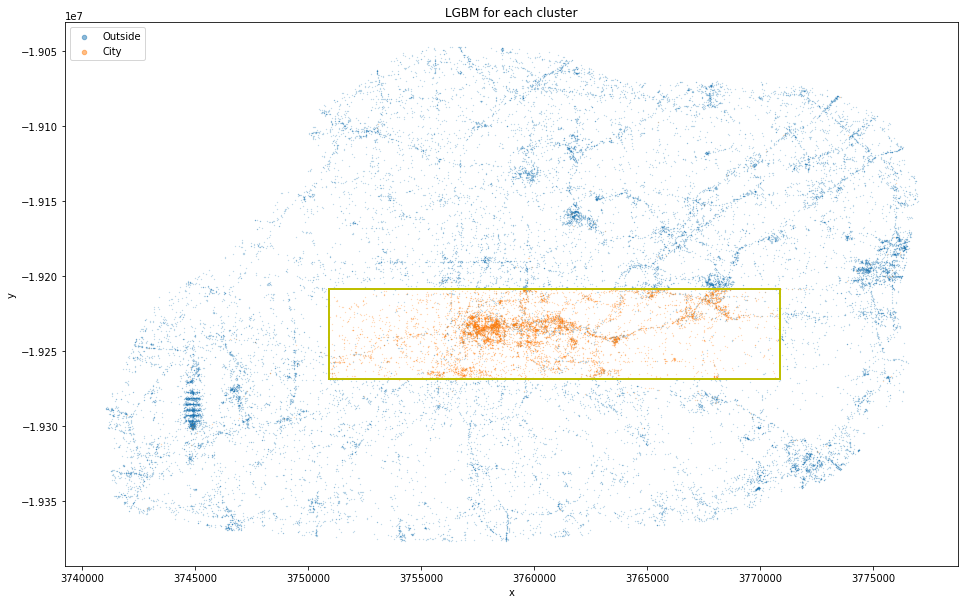

In [46]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_lgbm

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM for each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


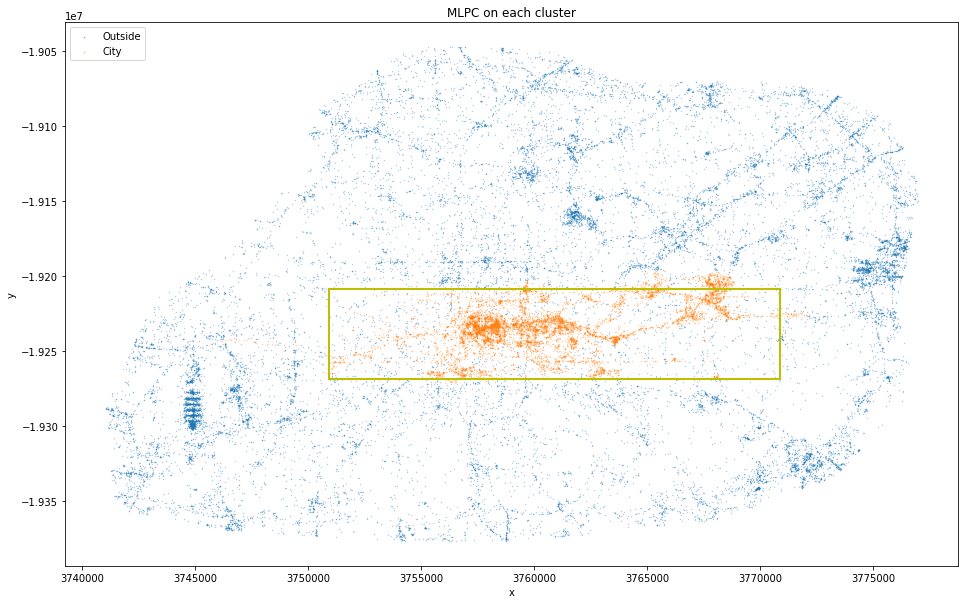

In [47]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]

df['target']=city_mlpc

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.1, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='MLPC on each cluster')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


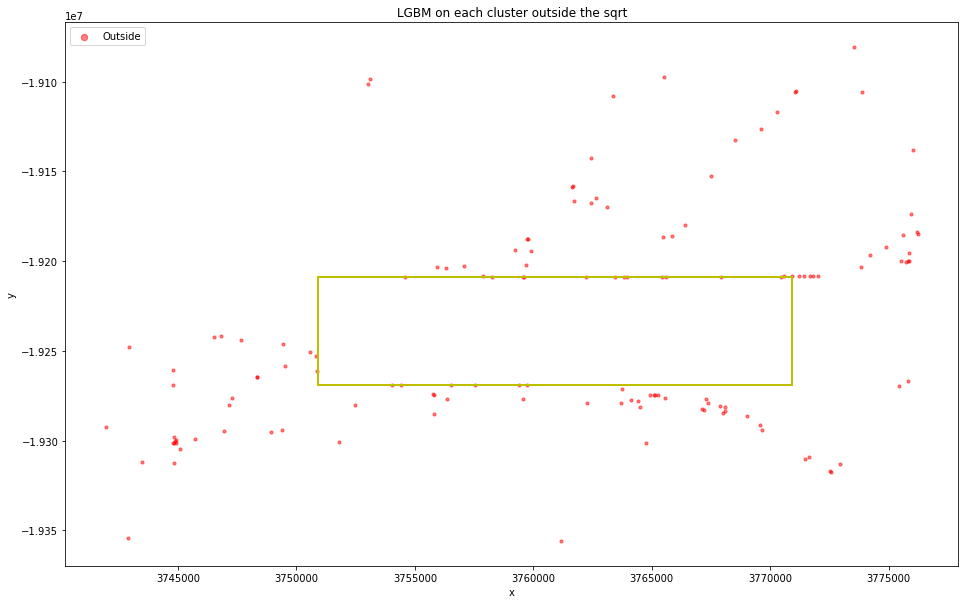

In [48]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['sqrt']=city_sqrt
df['target']=city_lgbm
df=df[df.sqrt==0]
leg=['Outside','City']
# Plot
for data in [df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM on each cluster outside the sqrt')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


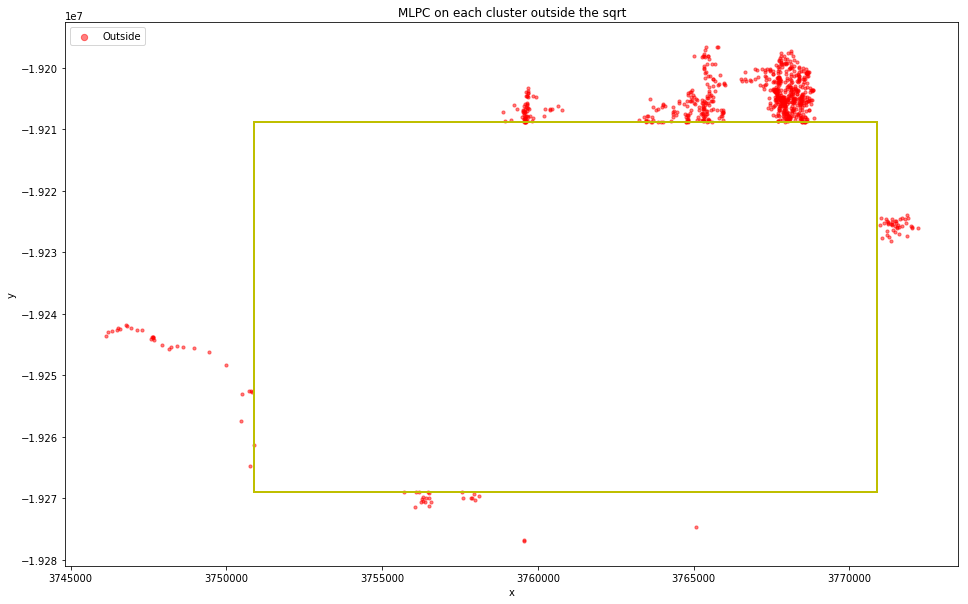

In [49]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['sqrt']=city_sqrt
df['target']=city_mlpc
df=df[df.sqrt==0]
leg=['Outside','City']
# Plot
for data in [df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='MLPC on each cluster outside the sqrt')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


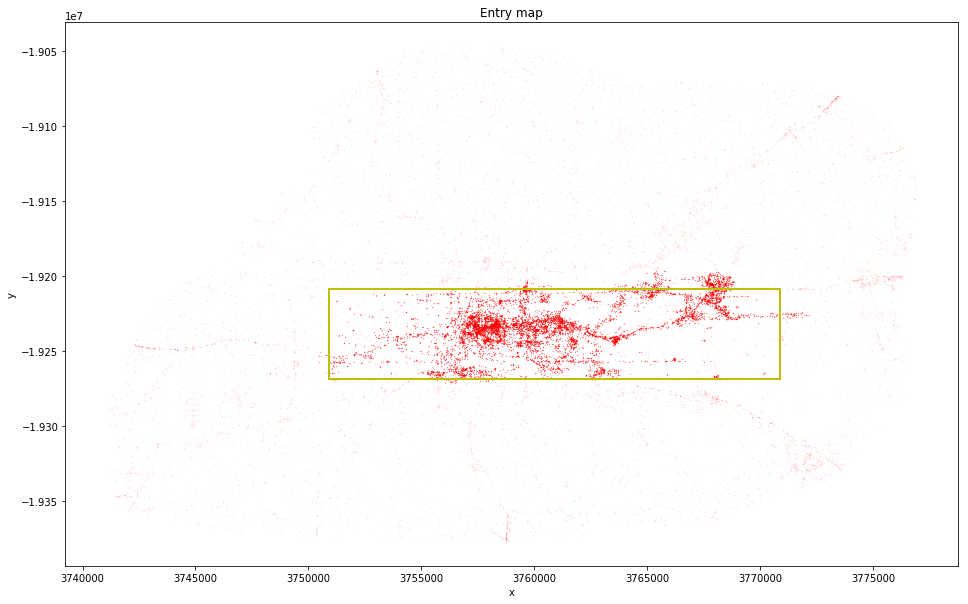

In [51]:
data=test2[['x_entry','y_entry']]


#train_c=kmeans.predict(data)
data['c']=test2_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

In [58]:
import statistics


#city = [score(statistics.mean(k)) for k in zip(city_proba_proba,city_lgbm_proba)]
city = [score(statistics.mean(k)) for k in zip(city_proba_proba,city_mlpc_proba,city_lgbm_proba)]


submission= pd.DataFrame()
trajectory_id = test2['trajectory_id']
submission['id']=trajectory_id 
submission['target'] = city_proba
submission.to_csv('./output/proba.csv',index=False)    
submission[:20]

id  target
0    traj_00032f51796fd5437b238e3a9823d13d_31_5       0
1   traj_000479418b5561ab694a2870cc04fd43_25_10       0
2    traj_000506a39775e5bca661ac80e3f466eb_29_5       1
3     traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4       0
4     traj_00063a4f6c12e1e4de7d876580620667_3_4       0
5    traj_0006535be25bb52dd06983447880c964_5_12       0
6    traj_0006f84bb33ec929d1cda7686f861d0a_31_3       1
7   traj_00093ae562586aed0e053b8431e8ace4_23_10       0
8    traj_000c739e444a70e1804d757a0580caaa_31_3       1
9    traj_000d479078af08618bddc7f09082b8c3_11_6       1
10  traj_000d6fba12a7d06defe90e3c9162c11e_29_11       0
11   traj_000efd6f95db39d6ba35027f02b5628f_9_20       1
12  traj_000feace3a33be9245e2783cdff467a8_15_12       0
13    traj_0011b48d0cf4f962833edd701afaf419_3_7       0
14   traj_001484cf0f956c316070be4b4c6352ff_29_7       0
15    traj_001d29060cfe35996cfeb141210ecbeb_9_2       1
16    traj_001dff40eab7eea1c10d0fadcea0c779_9_7       0
17   traj_001f9345a2979c553125c65499630f25_29_3       0
18   traj_002447d99e8f6c3bc6c1329140979a91_25_7       0
19   traj_002531dea45cd4059e92099630ebf775_3_10       0

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


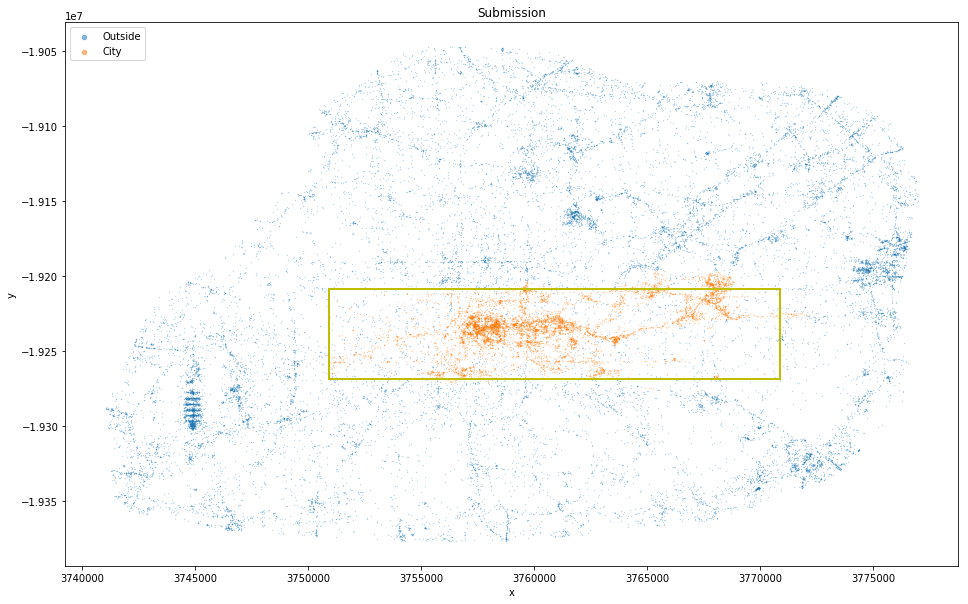

In [53]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Submission')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


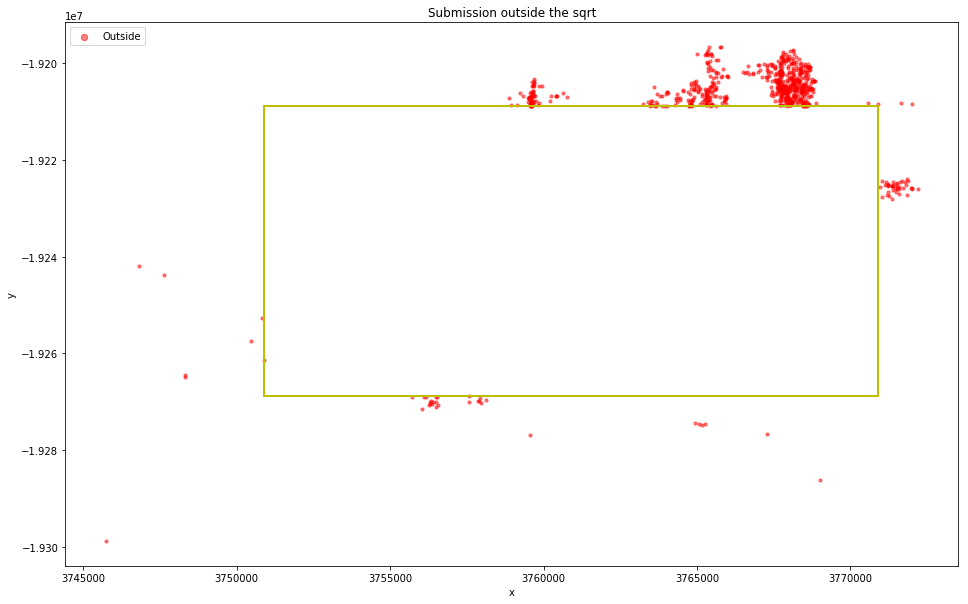

In [54]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['sqrt']=city_sqrt
df['target']=city
df=df[df.sqrt==0]
leg=['Outside','City']
# Plot
for data in [df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=10,c='r', alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Submission outside the sqrt')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()